# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer


from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action="ignore")


# Loading the Dataset

In [2]:
cd = pd.read_csv('C:/Users/44743/Downloads/CC GENERAL.csv')

In [3]:
cd.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

In [4]:
cd.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


 * Some columns have a big difference between min and max, so they are probably skewed

In [5]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleaning

In [6]:
cd.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
cd.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
cd = cd.dropna()

In [9]:
cd.shape

(8636, 18)

In [10]:
cd.nunique()

CUST_ID                             8636
BALANCE                             8631
BALANCE_FREQUENCY                     42
PURCHASES                           6015
ONEOFF_PURCHASES                    3922
INSTALLMENTS_PURCHASES              4341
CASH_ADVANCE                        4206
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         203
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

* nunique() displays unique values in each column

In [11]:
# the columns with higher number of unique values are removed
cd.drop(['CUST_ID', 'BALANCE', 'PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PAYMENTS', 'MINIMUM_PAYMENTS' ], axis=1, inplace= True)

In [12]:
print(cd.columns)

Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [13]:
cd.shape

(8636, 10)

# Visualisation of skewness of dataset

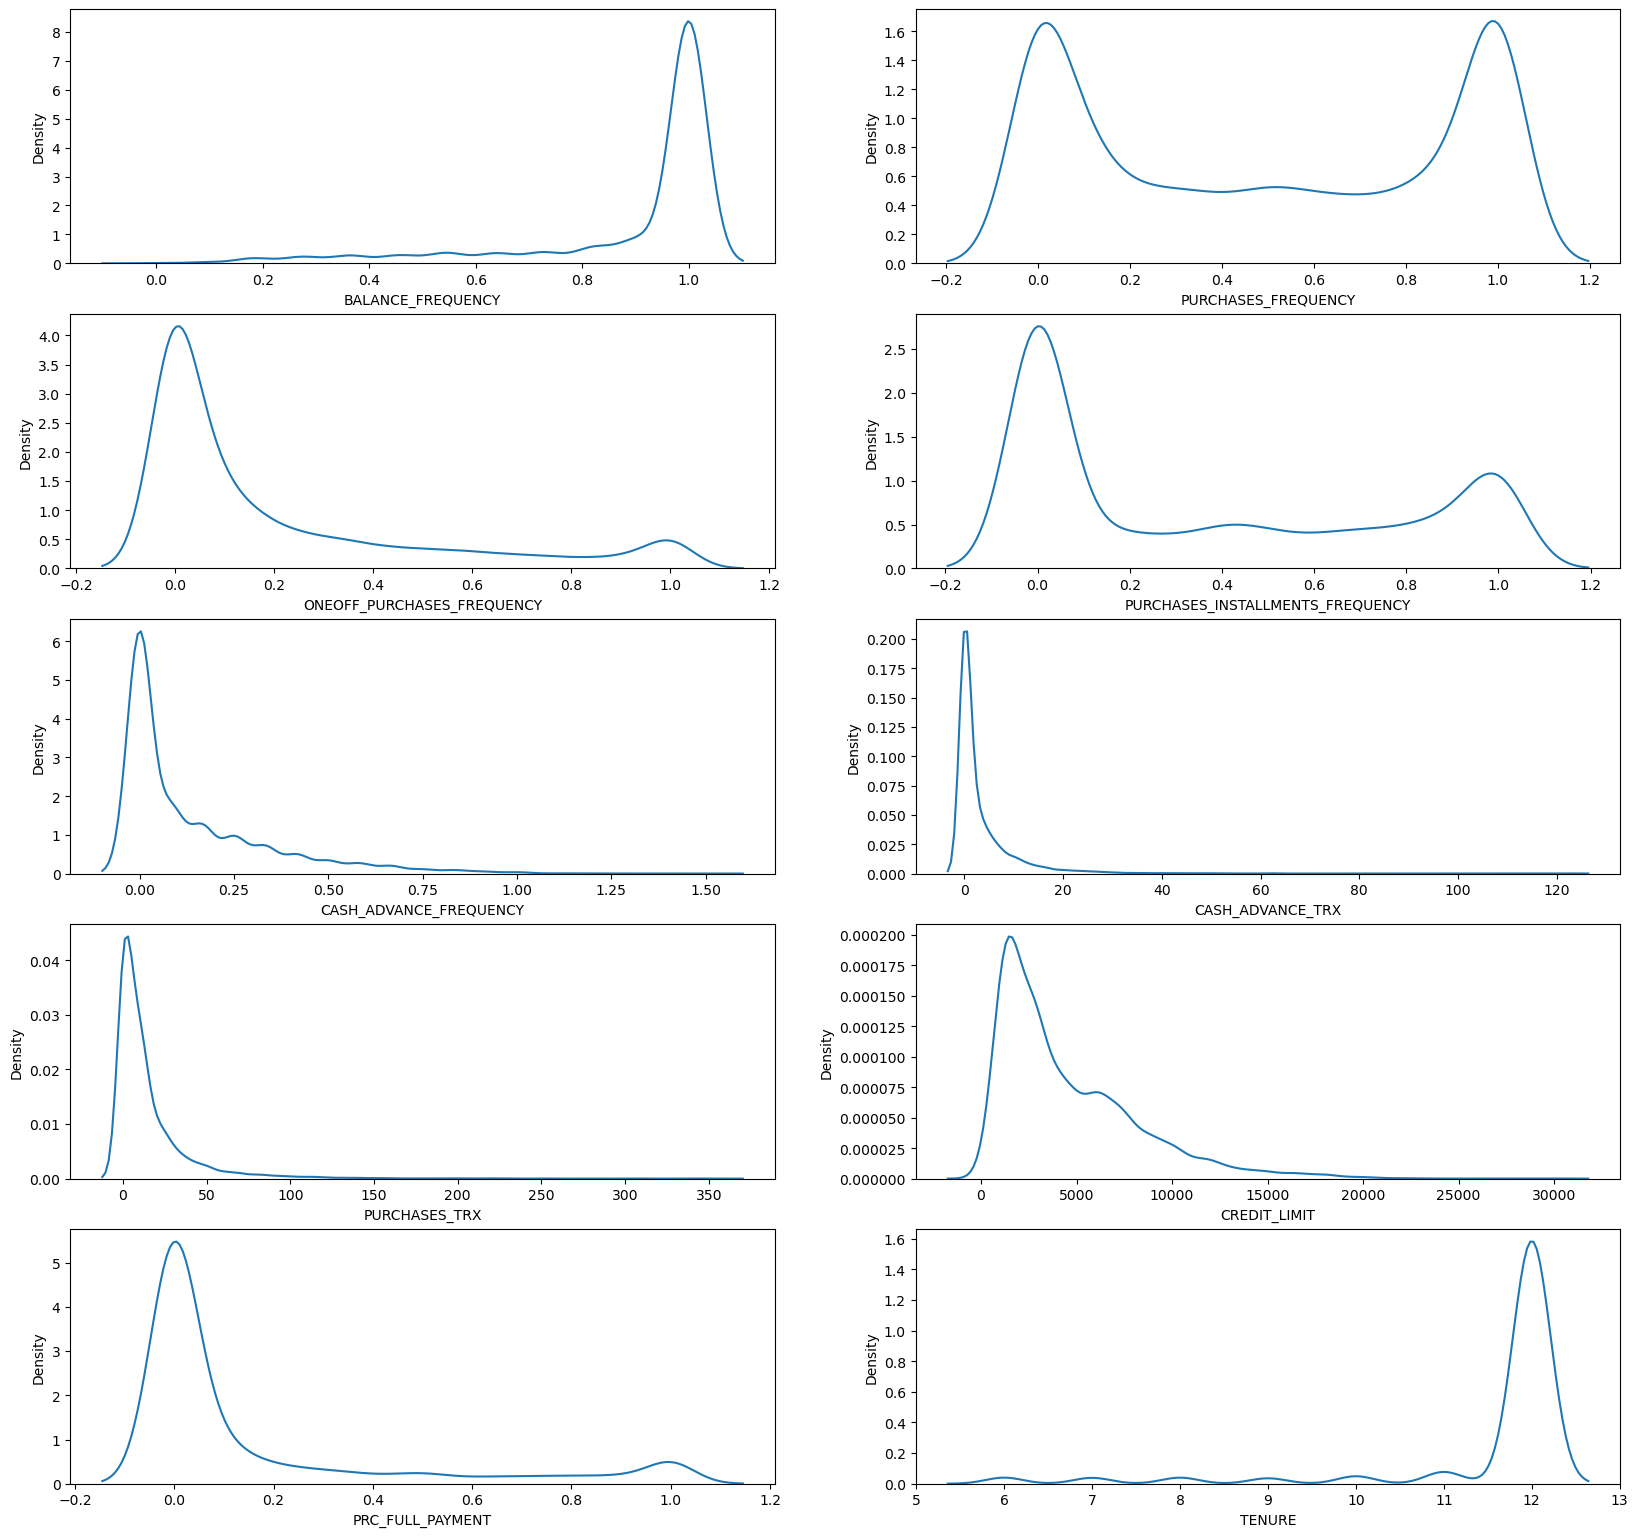

In [14]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cd.columns):
    if cd[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(cd[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

* TENURE,BALANCE_FREQUENCY Left Skewed Values
* PURCHASES_FREQUENCY have skewness values close to 0, indicating a relatively symmetrical distribution.
* rest of the columns have positive skewness values, indicating that the distribution is right-skewed 

* Currently, there is a significant degree of data skewness present. We will work on addressing this skewness, as doing so should improve the model's ability to create more accurate clusters. Let's explore potential solutions for this issue."

In [15]:
cols=['ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']

In [16]:
for col in cols:
    cd[col] = np.log(1 + cd[col])

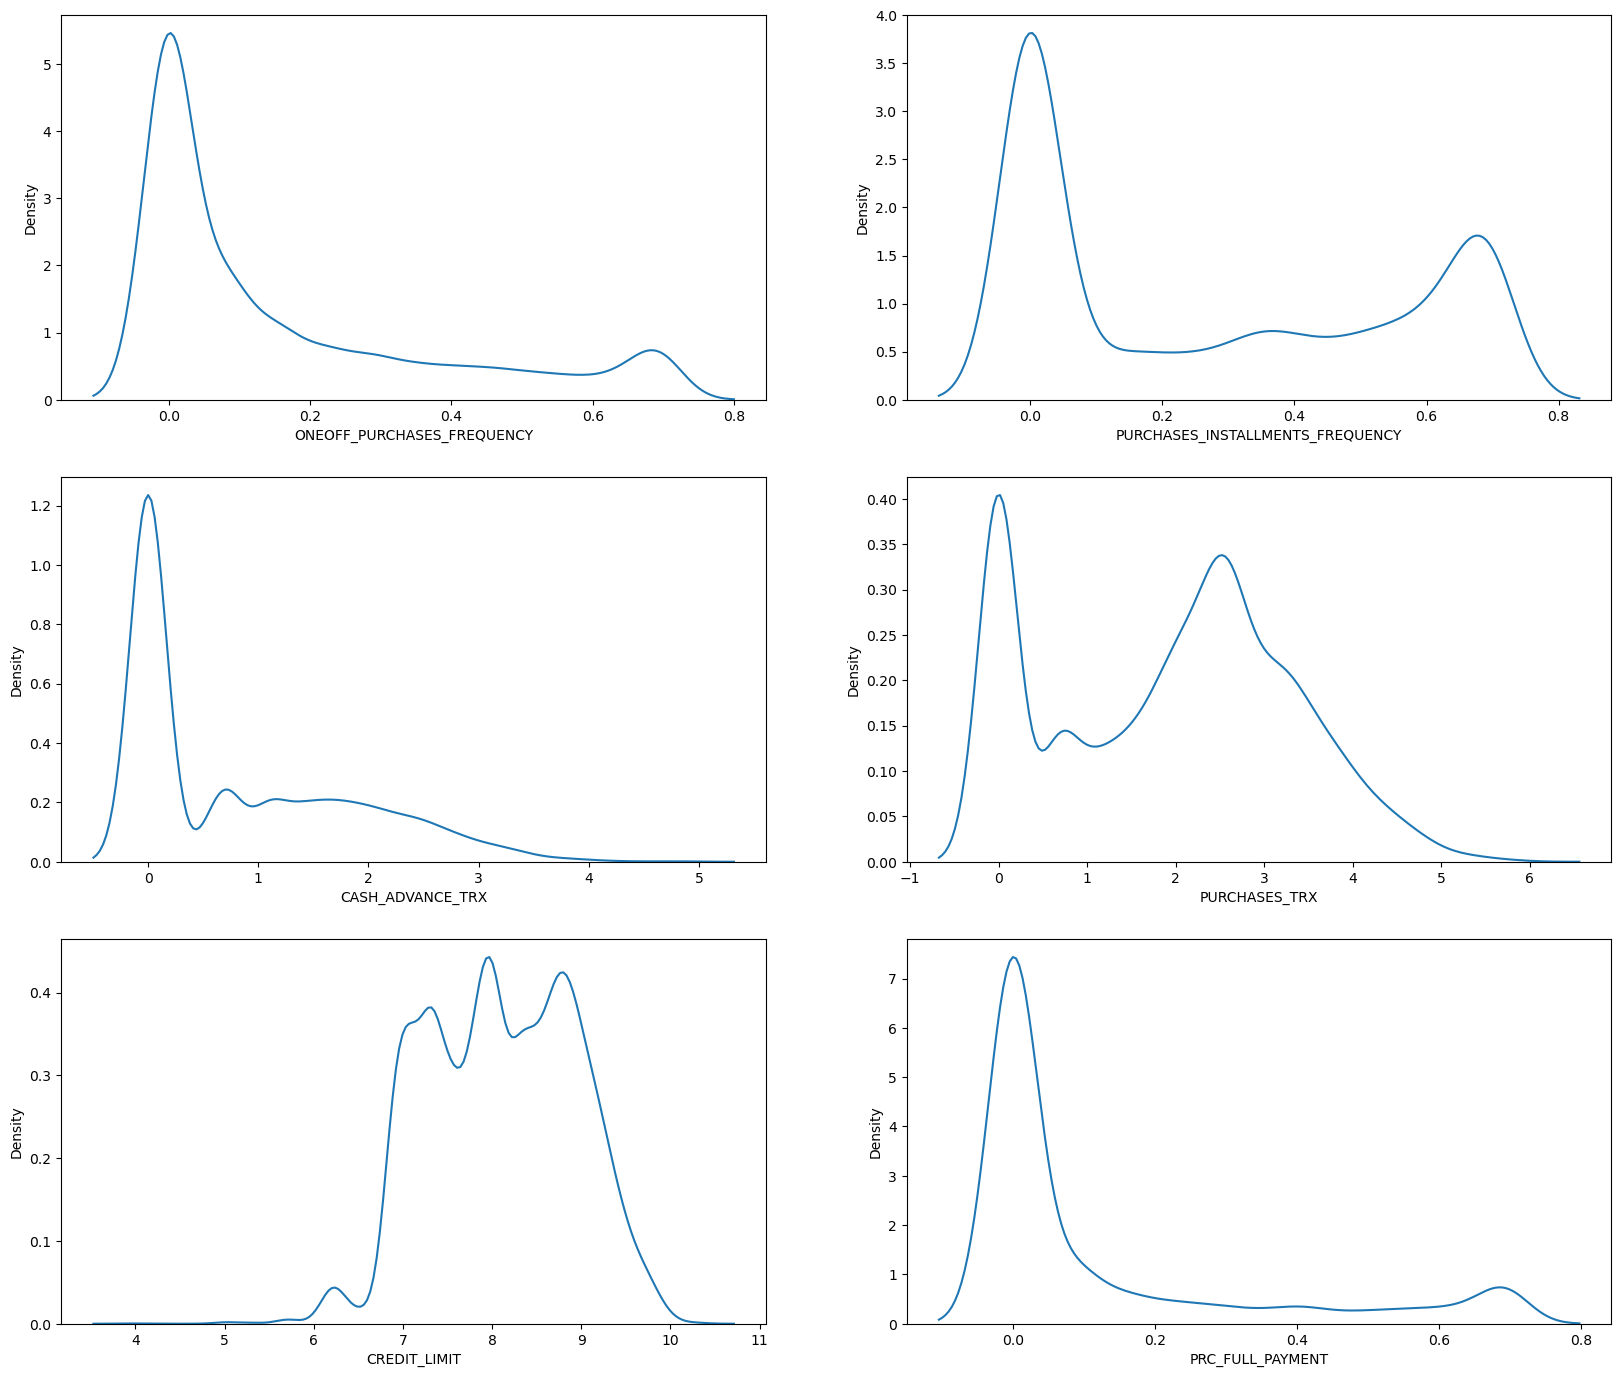

In [17]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(cd[col], ax=ax)
plt.show()

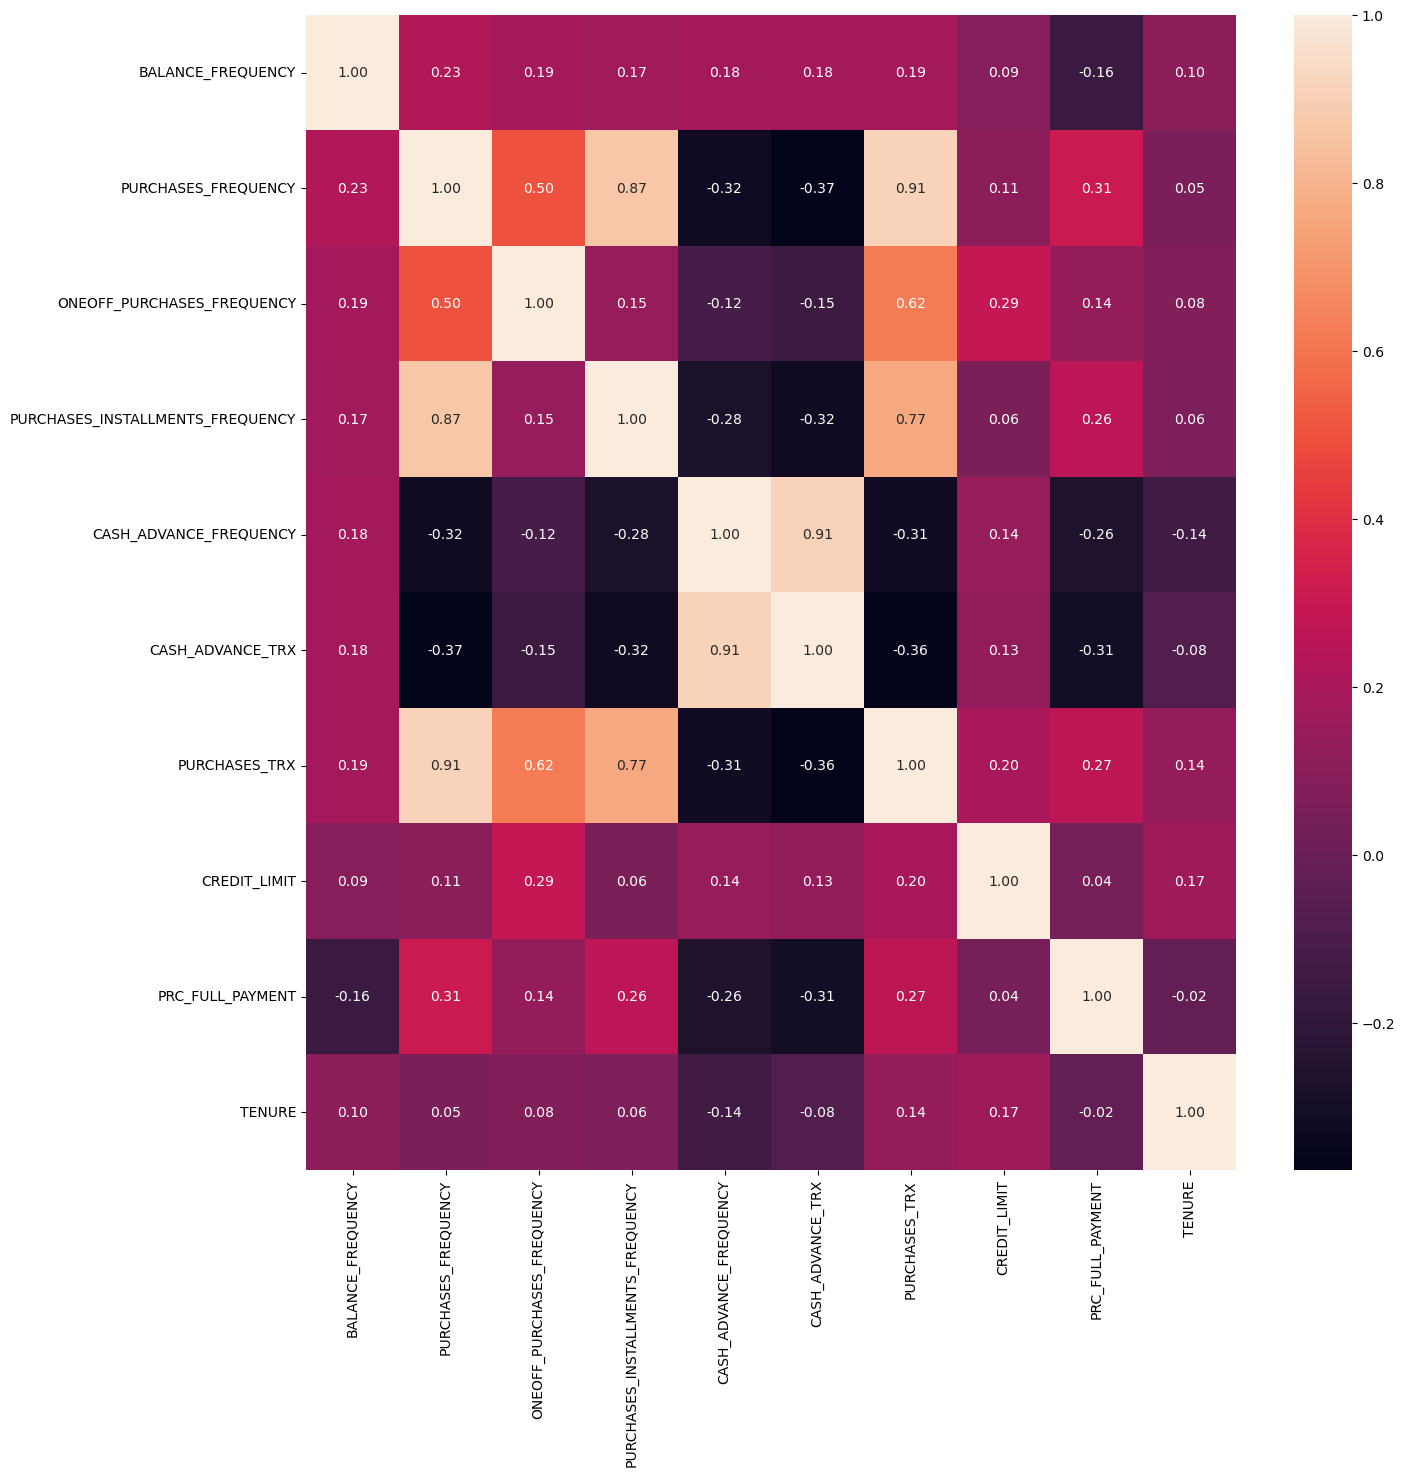

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(cd.corr(),annot=True,fmt='.2f')
plt.show()

* Higher correlation between :
* (PURCHASES_FREQUENCY, PURCHASES_TRX ): 0.91
* (CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX): 0.91
* (PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY): 0.87


# Applying Binning to the dataset

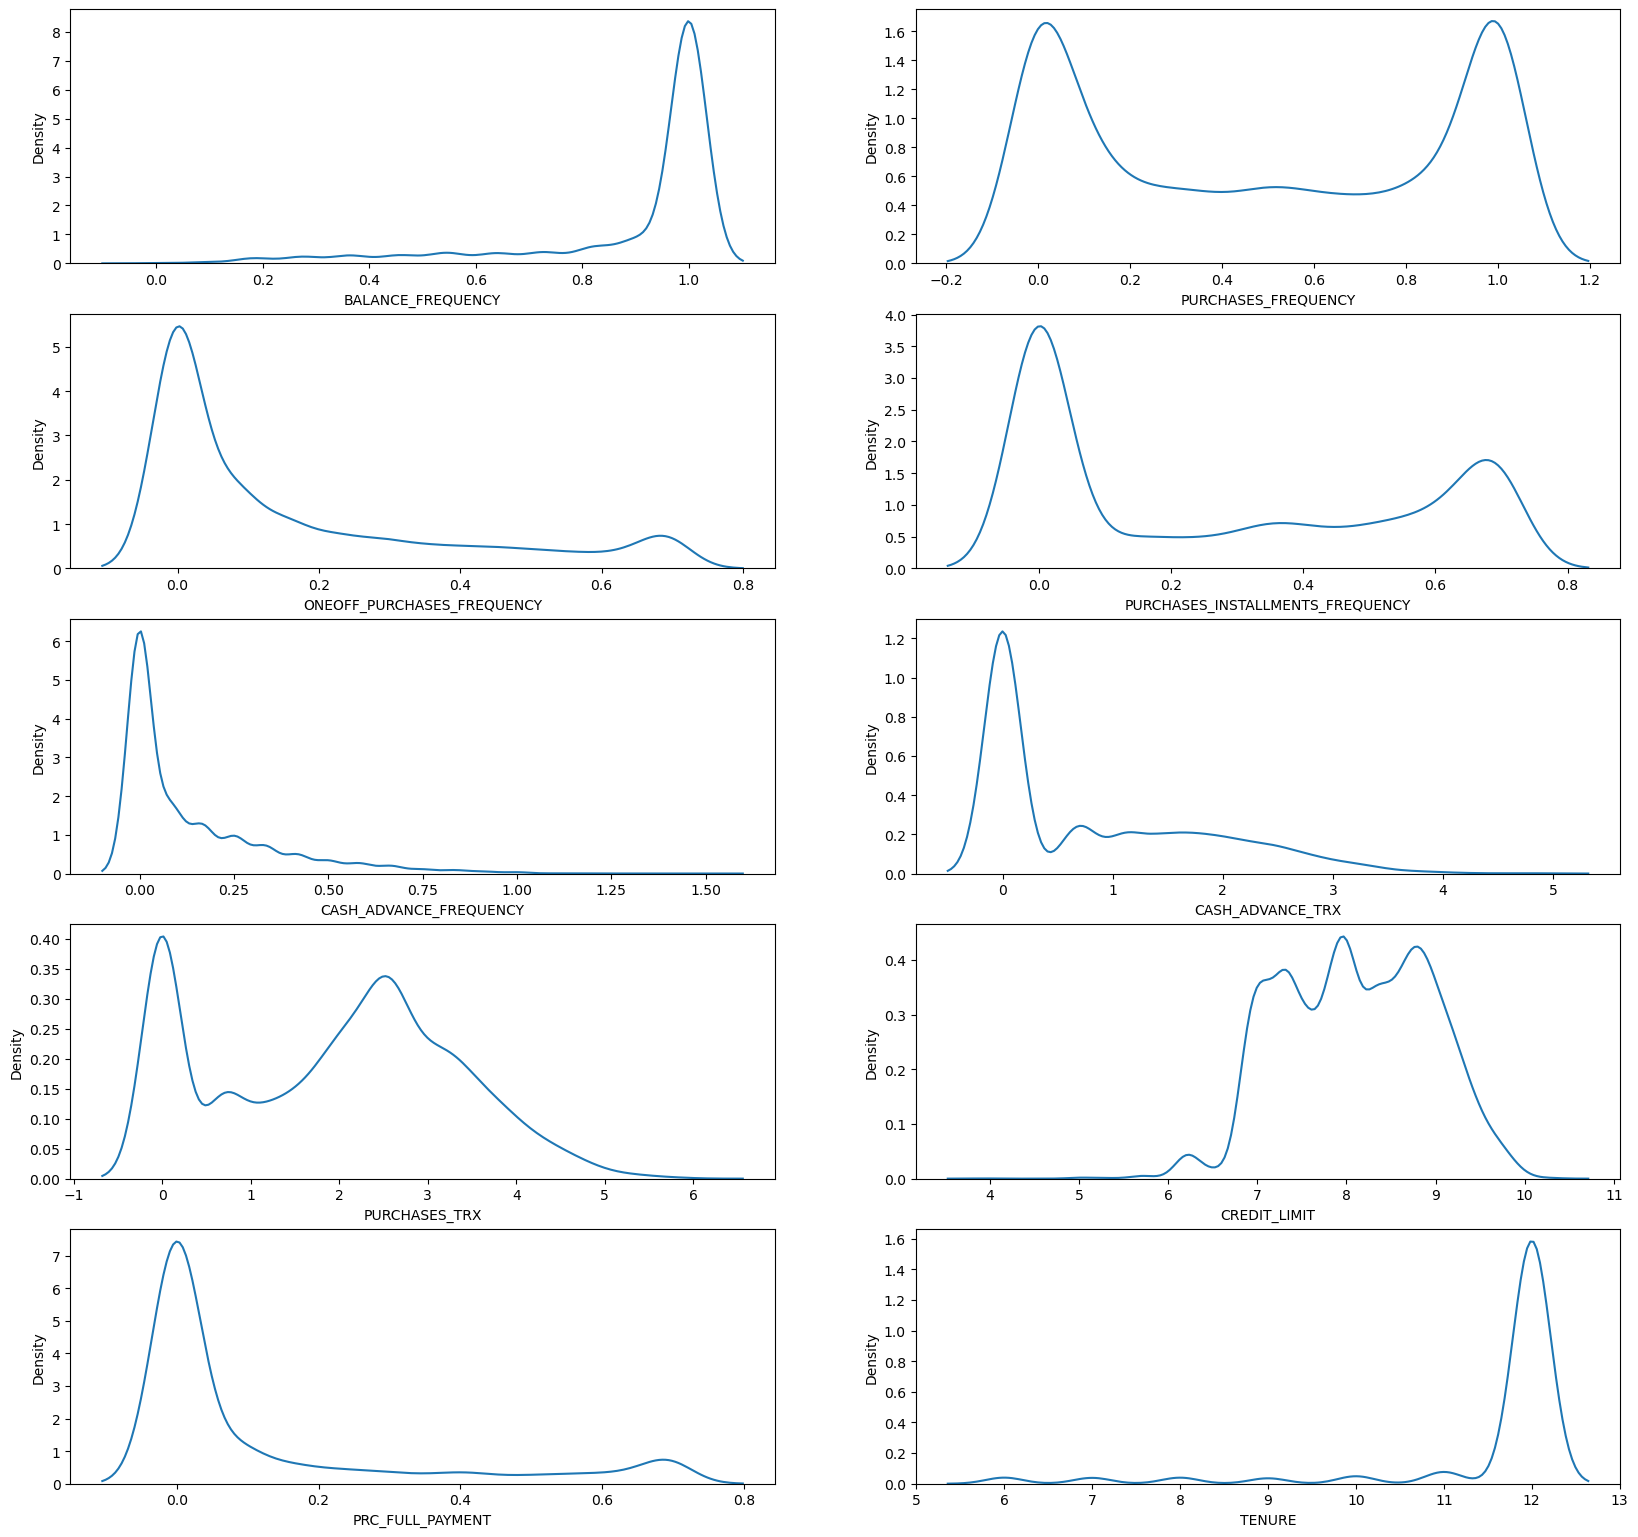

In [19]:
# Plot KDE plots before binning
plt.figure(figsize=(20, 35))
for i, col in enumerate(cd.columns):
    if cd[col].dtype != 'object':
        ax = plt.subplot(9, 2, i + 1)
        sns.kdeplot(cd[col], ax=ax)
        plt.xlabel(col)
plt.show()

In [20]:
# Apply equal width binning with 3 bins to specified columns
cols_to_binning = ['ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX',
                   'PURCHASES_TRX', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']

for col in cols_to_binning:
    cd[col + '_binned'] = pd.cut(cd[col], bins=27, labels=False)

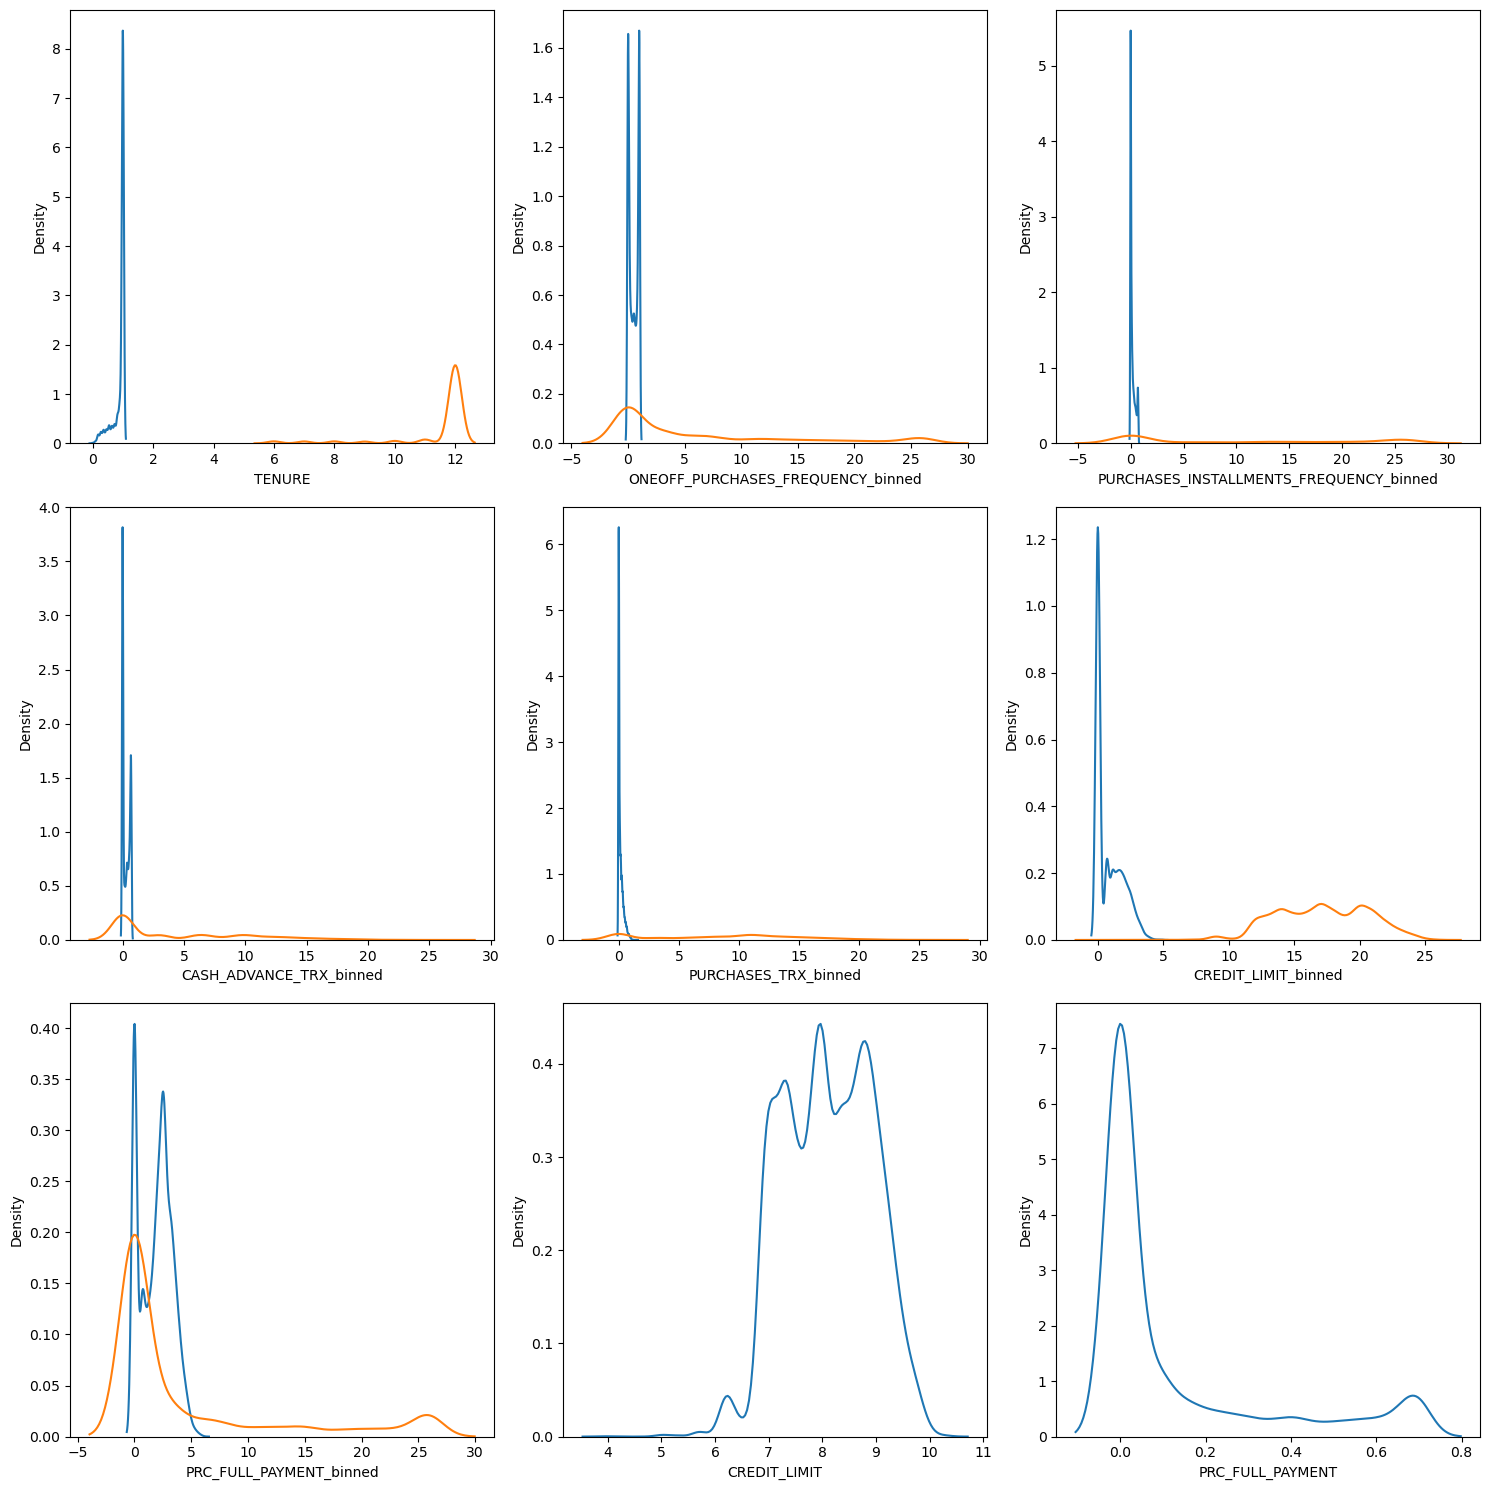

In [21]:
# Plot KDE plots after binning
plt.figure(figsize=(15, 15))
for i, col in enumerate(cd.columns):
    if cd[col].dtype != 'object':
        ax = plt.subplot(3, 3,i % 9 + 1)
        sns.kdeplot(cd[col], ax=ax)
        plt.xlabel(col)
plt.tight_layout()
plt.show()

# Handling Outliers

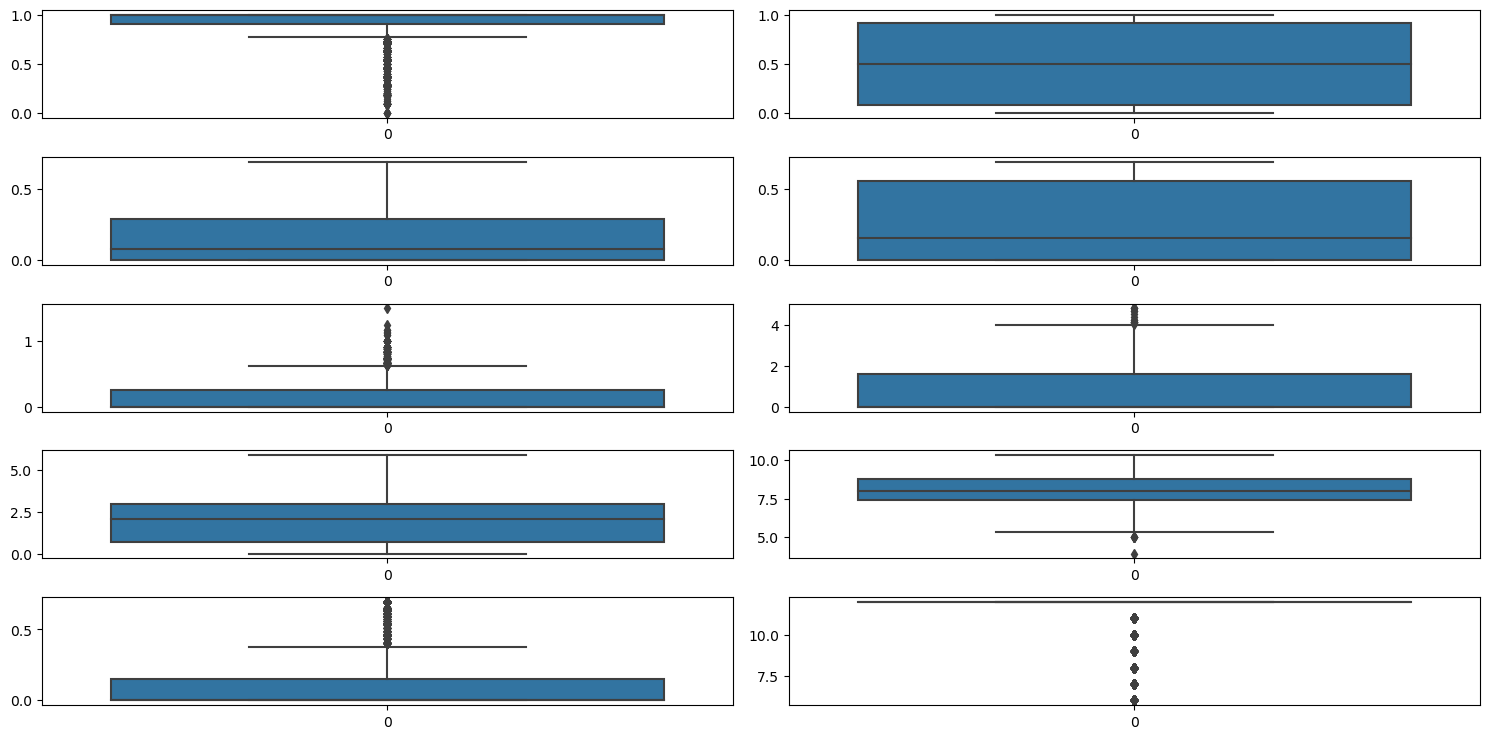

In [22]:
fig, axs = plt.subplots(5,2, figsize = (15,7.5))
plt1 = sns.boxplot(cd['BALANCE_FREQUENCY'], ax = axs[0,0])
plt2 = sns.boxplot(cd['PURCHASES_FREQUENCY'], ax = axs[0,1])
plt3 = sns.boxplot(cd['ONEOFF_PURCHASES_FREQUENCY'], ax = axs[1,0])
plt4 = sns.boxplot(cd['PURCHASES_INSTALLMENTS_FREQUENCY'], ax = axs[1,1])
plt5 = sns.boxplot(cd['CASH_ADVANCE_FREQUENCY'], ax = axs[2,0])
plt6 = sns.boxplot(cd['CASH_ADVANCE_TRX'], ax = axs[2,1])
plt7 = sns.boxplot(cd['PURCHASES_TRX'], ax = axs[3,0])
plt8 = sns.boxplot(cd['CREDIT_LIMIT'], ax = axs[3,1])
plt9 = sns.boxplot(cd['PRC_FULL_PAYMENT'], ax = axs[4,0])
plt10 = sns.boxplot(cd['TENURE'], ax = axs[4,1])

plt.tight_layout()

In [23]:
num_col = (cd.columns).to_list()

def outliers(cd, column):
  Q1 = cd[column].quantile(0.25)
  Q3 = cd[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(cd)):
      if cd[column].iloc[i] > upper_bound:
          cd[column].iloc[i] = upper_bound
      if cd[column].iloc[i] < lower_bound:
          cd[column].iloc[i] = lower_bound

for feature in num_col:
  outliers(cd, feature)

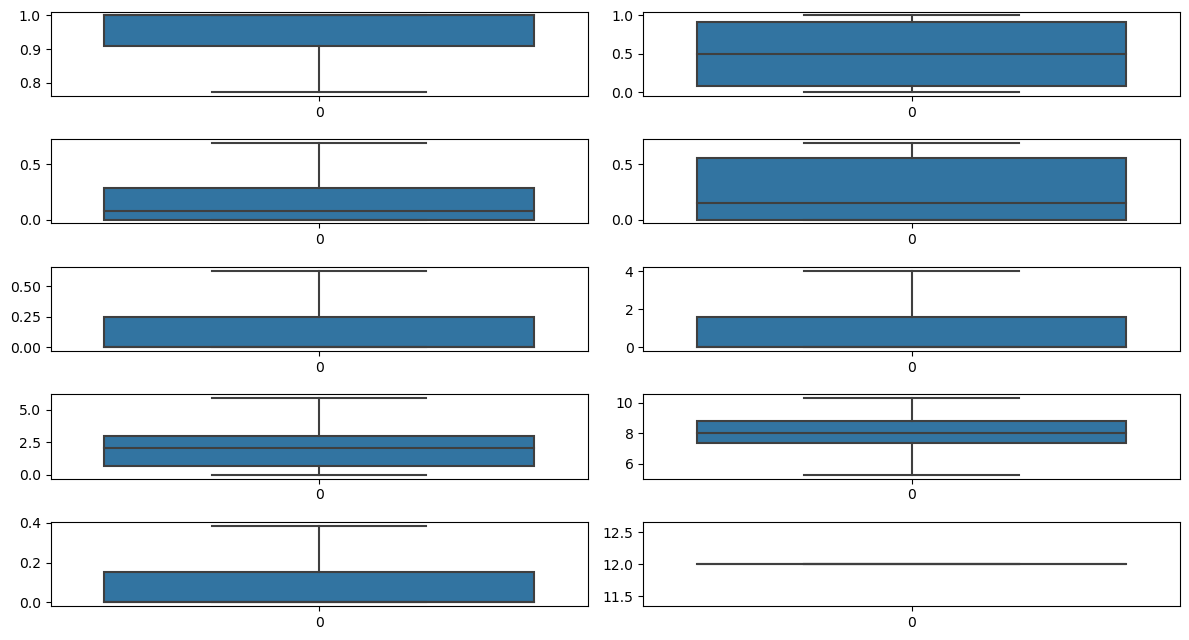

In [24]:
fig, axs = plt.subplots(5,2, figsize = (12,6.5))
plt1 = sns.boxplot(cd['BALANCE_FREQUENCY'], ax = axs[0,0])
plt2 = sns.boxplot(cd['PURCHASES_FREQUENCY'], ax = axs[0,1])
plt3 = sns.boxplot(cd['ONEOFF_PURCHASES_FREQUENCY'], ax = axs[1,0])
plt4 = sns.boxplot(cd['PURCHASES_INSTALLMENTS_FREQUENCY'], ax = axs[1,1])
plt5 = sns.boxplot(cd['CASH_ADVANCE_FREQUENCY'], ax = axs[2,0])
plt6 = sns.boxplot(cd['CASH_ADVANCE_TRX'], ax = axs[2,1])
plt7 = sns.boxplot(cd['PURCHASES_TRX'], ax = axs[3,0])
plt8 = sns.boxplot(cd['CREDIT_LIMIT'], ax = axs[3,1])
plt9 = sns.boxplot(cd['PRC_FULL_PAYMENT'], ax = axs[4,0])
plt9 = sns.boxplot(cd['TENURE'], ax = axs[4,1])

plt.tight_layout()

# Scaling

In [25]:
scaling = StandardScaler()
scaling.fit(cd)
scaled_data = pd.DataFrame(scaling.transform(cd),columns= cd.columns )
print("All features have now been scaled.")

All features have now been scaled.


# Normalising data

In [26]:
x = cd.values #returning a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.2       , 0.166667  , 0.        , 0.11547677, 0.        ,
        0.        , 0.18673331, 0.32435808, 0.        , 0.        ,
        0.        , 0.11538462, 0.        , 0.19230769, 0.33333333,
        0.        ],
       [0.6       , 0.        , 0.        , 0.        , 0.4       ,
        0.4       , 0.        , 0.71084935, 0.52071166, 0.        ,
        0.        , 0.        , 0.4       , 0.        , 0.71428571,
        0.46666667],
       [1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.43596954, 0.72455667, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.42307692, 0.76190476,
        0.        ],
       [1.        , 0.083333  , 0.11547677, 0.        , 0.        ,
        0.        , 0.1178156 , 0.36055315, 0.        , 0.        ,
        0.11538462, 0.        , 0.        , 0.11538462, 0.38095238,
        0.        ],
       [1.        , 0.666667  , 0.        , 0.66296471, 0.        ,
        0.        , 0.37346663, 

# PCA (Principal Component Analysis)

In [27]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Clustering 

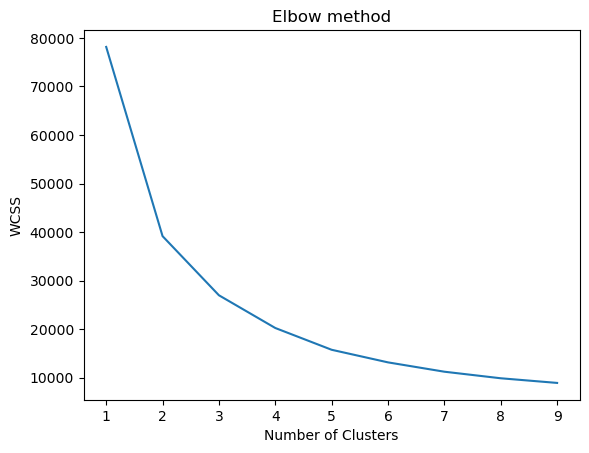

In [28]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(principal_components) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

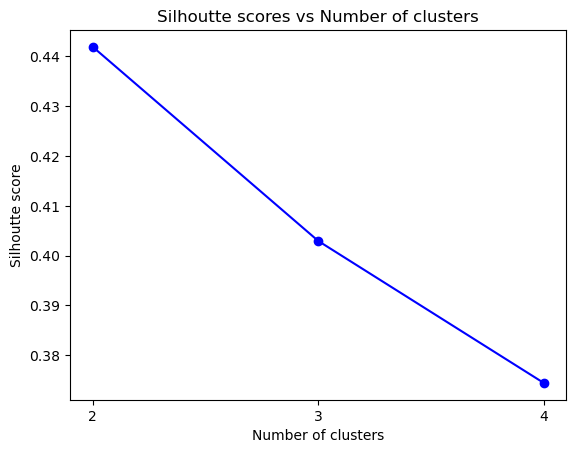

Silhouette Score - KMeans: [0.44191157414263454, 0.4029410778401349, 0.37443401545306176]


In [29]:
silhoutte_scores = [silhouette_score(principal_components , model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()
print(f"Silhouette Score - KMeans: {silhoutte_scores}")

* The Silhoutte Score is highest when number of clusters is 2. So we choose 2 as optimum number of clusters

In [30]:
# Number of clusters
k = 2

In [31]:
# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cd['KMeans_Cluster'] = kmeans.fit_predict(principal_components)

In [32]:
# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=k)
cd['Agg_Cluster'] = agg_cluster.fit_predict(principal_components)

In [33]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cd['DBSCAN_Cluster'] = dbscan.fit_predict(principal_components)

# Evaluation of Clustering Algorithms

In [34]:
# Evaluate the clusters using silhouette score and Davies-Bouldin index
silhouette_kmeans = silhouette_score(principal_components, cd['KMeans_Cluster'])
silhouette_agg = silhouette_score(principal_components, cd['Agg_Cluster'])
silhouette_dbscan = silhouette_score(principal_components, cd['DBSCAN_Cluster'])

In [35]:
db_index_kmeans = davies_bouldin_score(principal_components, cd['KMeans_Cluster'])
db_index_agg = davies_bouldin_score(principal_components, cd['Agg_Cluster'])
db_index_dbscan = davies_bouldin_score(principal_components, cd['DBSCAN_Cluster'])

In [36]:
# Evaluate the clusters using Calinski-Harabasz Index
ch_index_kmeans = calinski_harabasz_score(principal_components, cd['KMeans_Cluster'])
ch_index_agg = calinski_harabasz_score(principal_components, cd['Agg_Cluster'])
ch_index_dbscan = calinski_harabasz_score(principal_components, cd['DBSCAN_Cluster'])


In [37]:
print(f"Silhouette Score - KMeans: {silhouette_kmeans}")
print(f"Silhouette Score - Agglomerative: {silhouette_agg}")
print(f"Silhouette Score - DBSCAN: {silhouette_dbscan}")

Silhouette Score - KMeans: 0.44191157414263454
Silhouette Score - Agglomerative: 0.3971925673449215
Silhouette Score - DBSCAN: 0.3786536873132722


In [38]:
print(f"Davies-Bouldin Index - KMeans: {db_index_kmeans}")
print(f"Davies-Bouldin Index - Agglomerative: {db_index_agg}")
print(f"Davies-Bouldin Index - DBSCAN: {db_index_dbscan}")

Davies-Bouldin Index - KMeans: 0.8893853618586536
Davies-Bouldin Index - Agglomerative: 0.9781129657168599
Davies-Bouldin Index - DBSCAN: 1.978124831484576


In [39]:
print(f"Calinski-Harabasz Index - KMeans: {ch_index_kmeans}")
print(f"Calinski-Harabasz Index - Agglomerative: {ch_index_agg}")
print(f"Calinski-Harabasz Index - DBSCAN: {ch_index_dbscan}")

Calinski-Harabasz Index - KMeans: 8592.186310690977
Calinski-Harabasz Index - Agglomerative: 7311.981205685072
Calinski-Harabasz Index - DBSCAN: 23.33852934248747


# Visualisation of Clustering

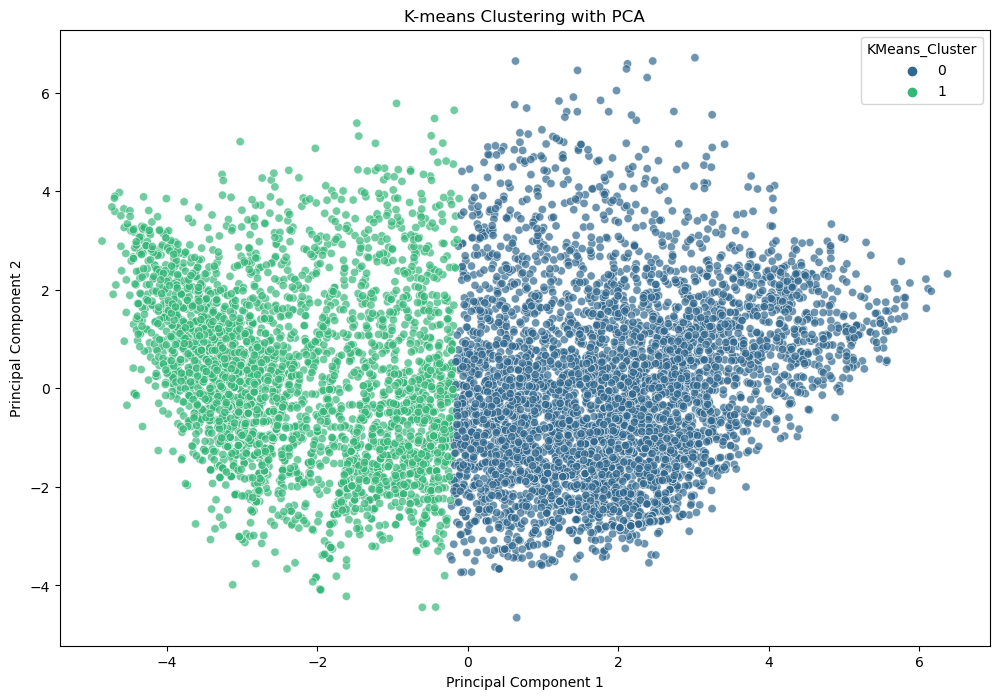

In [40]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cd['KMeans_Cluster'], palette='viridis', alpha=0.7)
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

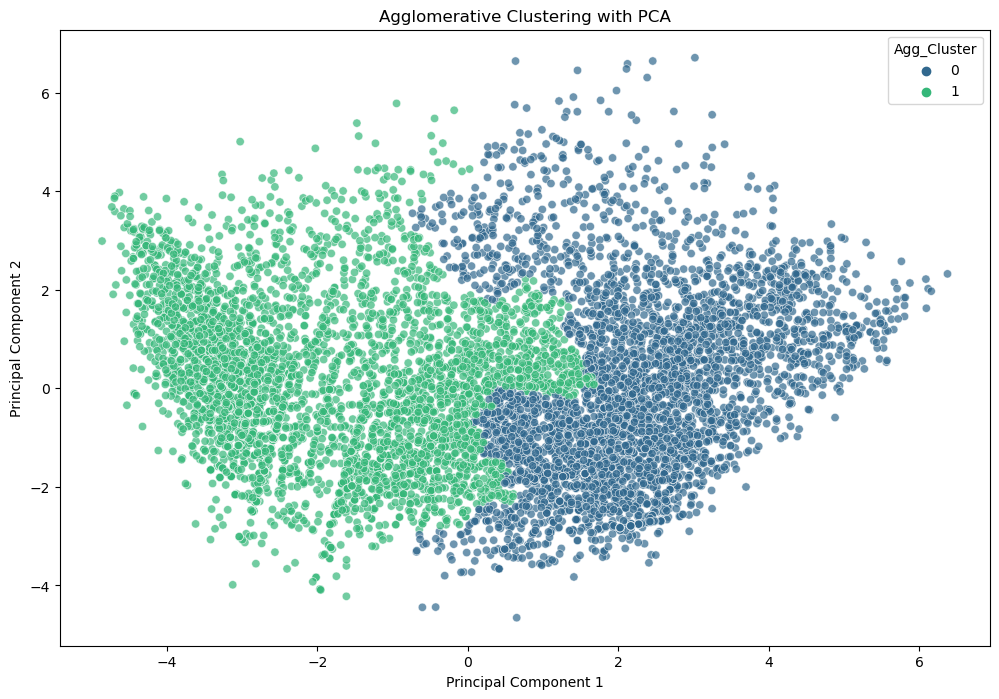

In [41]:
# Visualize Agglomerative clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cd['Agg_Cluster'], palette='viridis', alpha=0.7)
plt.title('Agglomerative Clustering with PCA')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

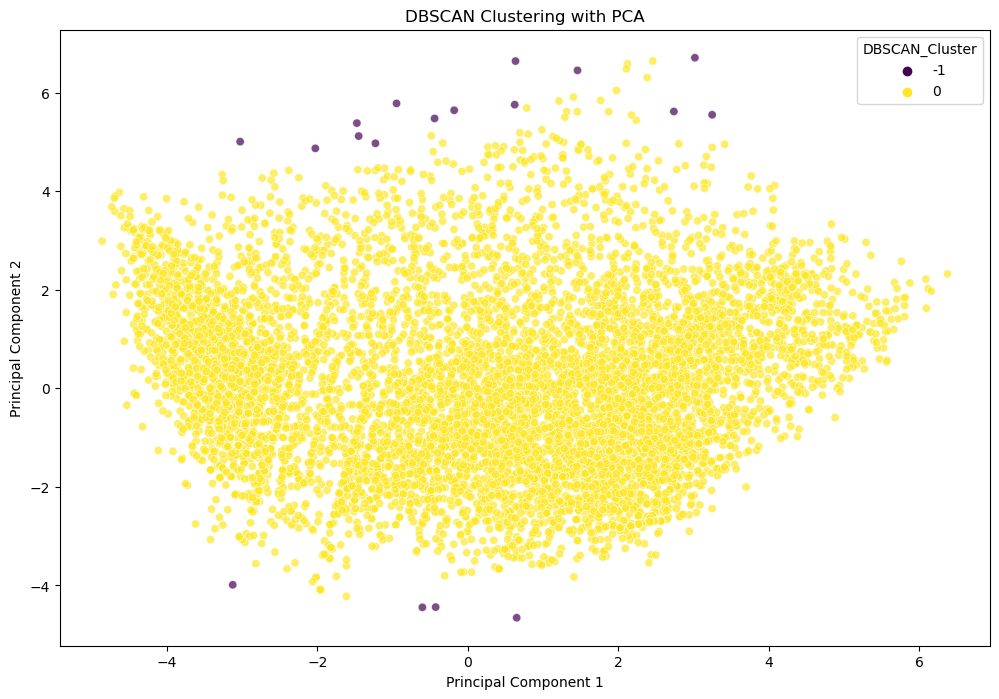

In [42]:
# Visualize DBSCAN clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cd['DBSCAN_Cluster'], palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualisation of each K-Means Cluster

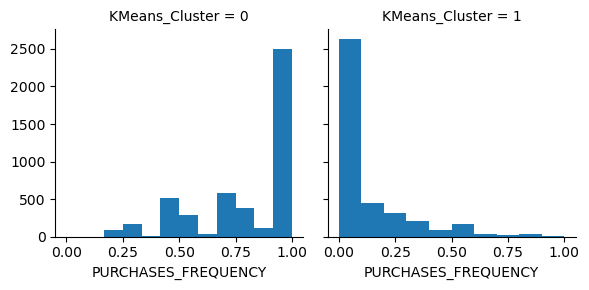

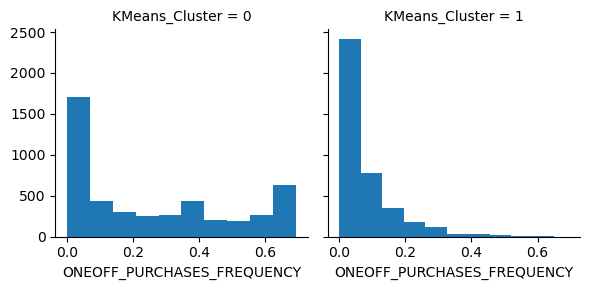

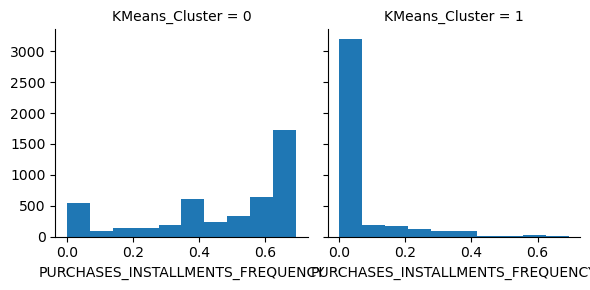

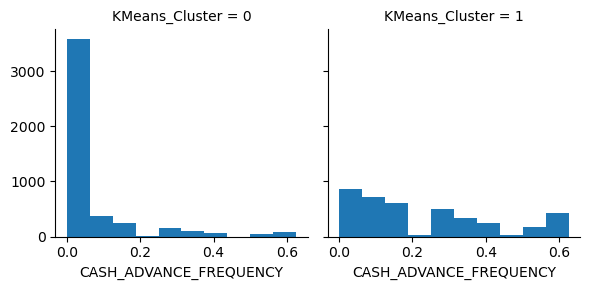

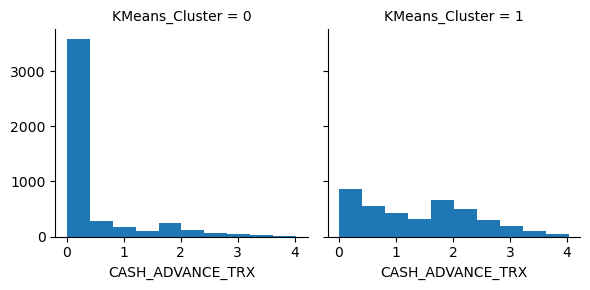

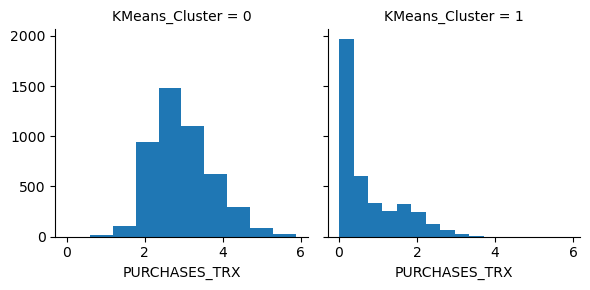

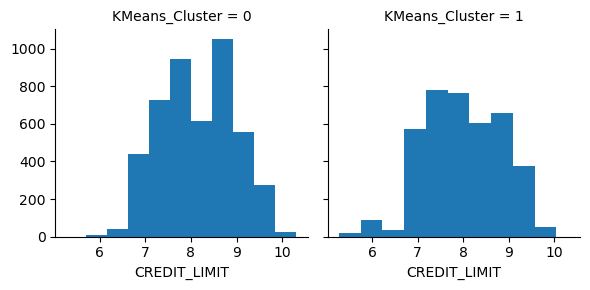

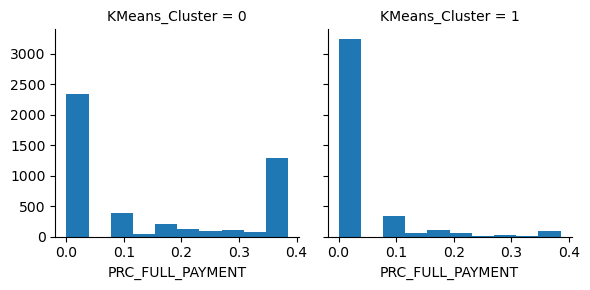

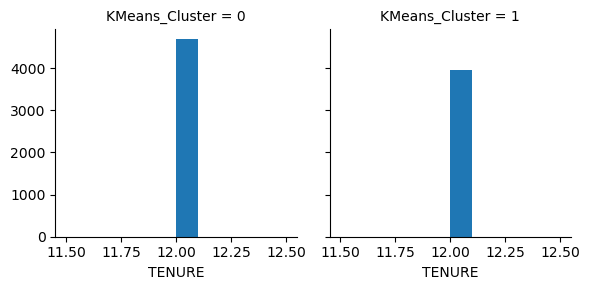

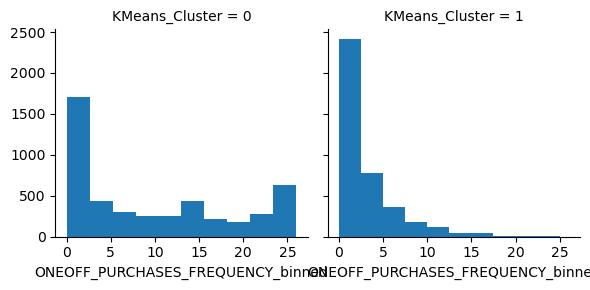

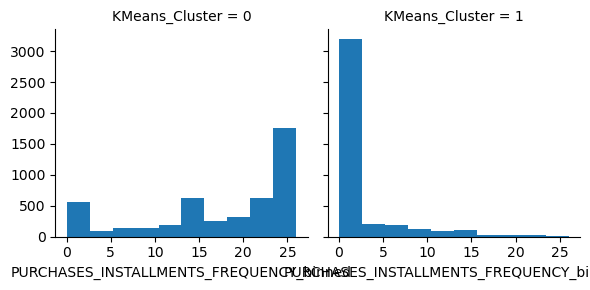

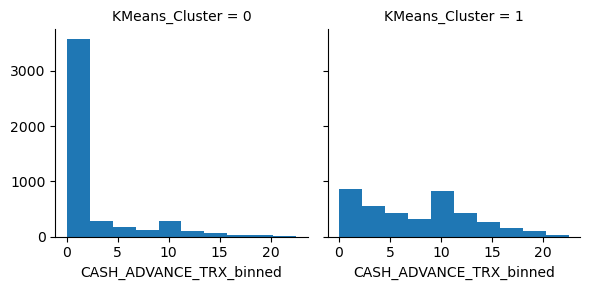

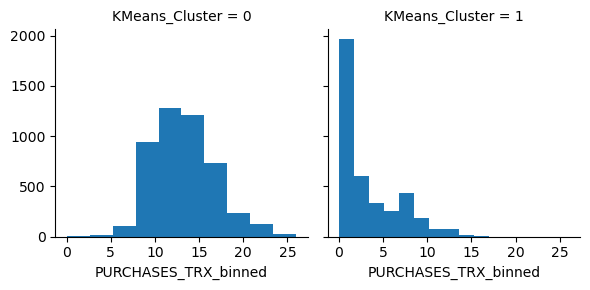

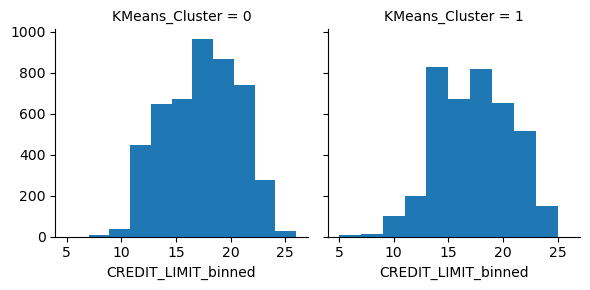

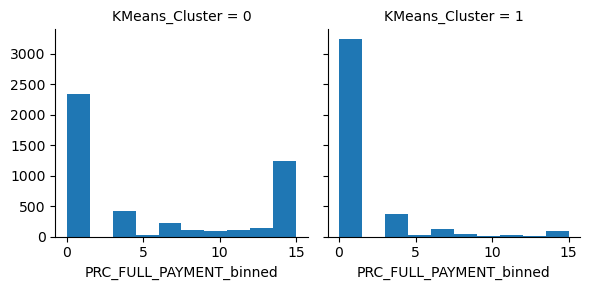

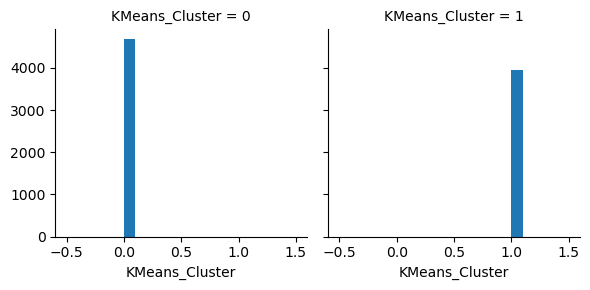

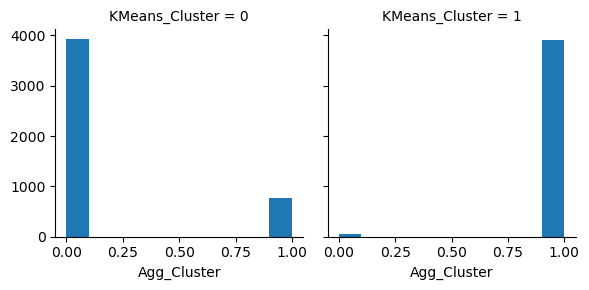

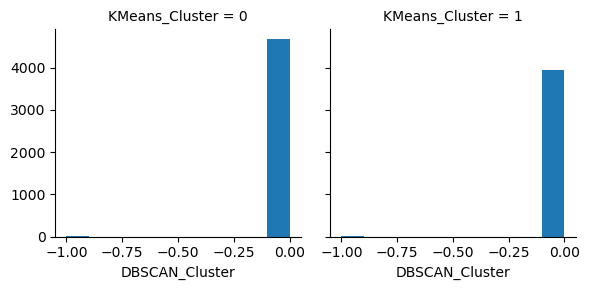

In [43]:
# Histogram - Features Value of Each Cluster for K-means
for feature in list(cd.columns[1:]):
    g = sns.FacetGrid(cd, col='KMeans_Cluster')
    g = g.map(plt.hist, feature)
    plt.show()